In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_excel("../Dataset/entrenamiento.xlsx")
data = data.rename(columns={"C7.1": "C8", "des": "QUALITY"})
features = data.drop(columns=["QUALITY"])

In [22]:
data.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8,5
1,6.2,0.246860,NaN,5.0,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8,6
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7,5
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4,5
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2,5


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       3684 non-null   float64
 1   C2       3664 non-null   float64
 2   C3       3648 non-null   float64
 3   C4       3636 non-null   float64
 4   C5       3659 non-null   float64
 5   C6       3655 non-null   float64
 6   C7       3645 non-null   float64
 7   C8       3646 non-null   float64
 8   C9       3658 non-null   float64
 9   C10      3639 non-null   float64
 10  C11      3658 non-null   float64
 11  QUALITY  3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [24]:
data.isna().sum()

C1         234
C2         254
C3         270
C4         282
C5         259
C6         263
C7         273
C8         272
C9         260
C10        279
C11        260
QUALITY      0
dtype: int64

In [25]:
# Getting a count of how many rows have 0 NA, 1 NA, 2 NA, 3 NA, 4 NA, 5 NA
data.isna().sum(axis=1).value_counts()

0    1788
1    1502
2     496
3     117
4      14
5       1
dtype: int64

In [27]:
# Number of values in each quality label
data.value_counts("QUALITY").sort_values(ascending=False)

QUALITY
6    1742
5    1182
7     701
4     137
8     137
3      14
9       5
dtype: int64

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,3684.0,6.857166,0.846430,3.800000,6.300000,6.800000,7.300000,14.200000
C2,3664.0,0.421440,0.988207,0.076961,0.190620,0.231112,0.285179,6.913737
C3,3648.0,0.284054,0.086887,0.000000,0.239017,0.277632,0.329304,0.802002
C4,3636.0,6.424642,5.084063,0.600000,1.700000,5.300000,9.900000,65.800000
C5,3659.0,40.685294,25.106022,0.020000,33.000000,41.000000,49.000000,346.000000
C6,3655.0,35.216142,17.167346,2.000000,23.000000,34.000000,46.000000,289.000000
C7,3645.0,4.885591,0.341723,2.302585,4.691348,4.912655,5.129899,6.089045
C8,3646.0,65.824651,245.359289,0.987110,0.991800,0.994100,0.996825,1001.000000
C9,3658.0,3.188291,0.152155,2.720000,3.090000,3.180000,3.280000,3.820000
C10,3639.0,0.395421,0.074535,0.198851,0.343590,0.385262,0.438255,0.732368


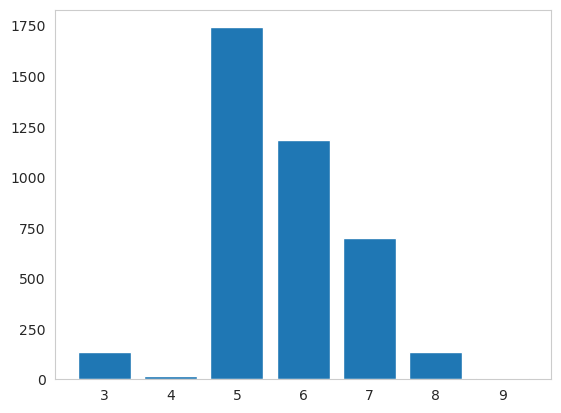

In [33]:
plt.bar(data.QUALITY.unique(), data.QUALITY.value_counts(""))
plt.grid()
plt.show()

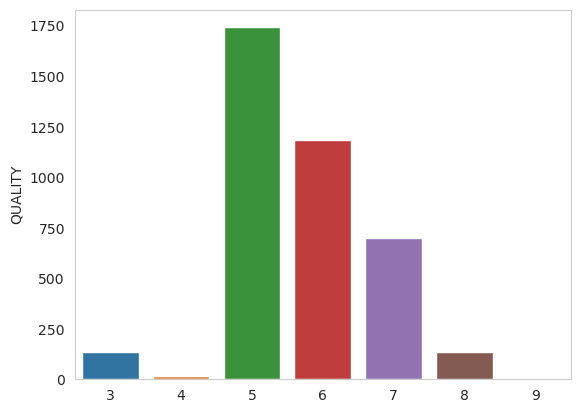

In [34]:
sns.barplot(x=data.QUALITY.unique(), y=data.QUALITY.value_counts(""))
plt.grid(False)
plt.show()

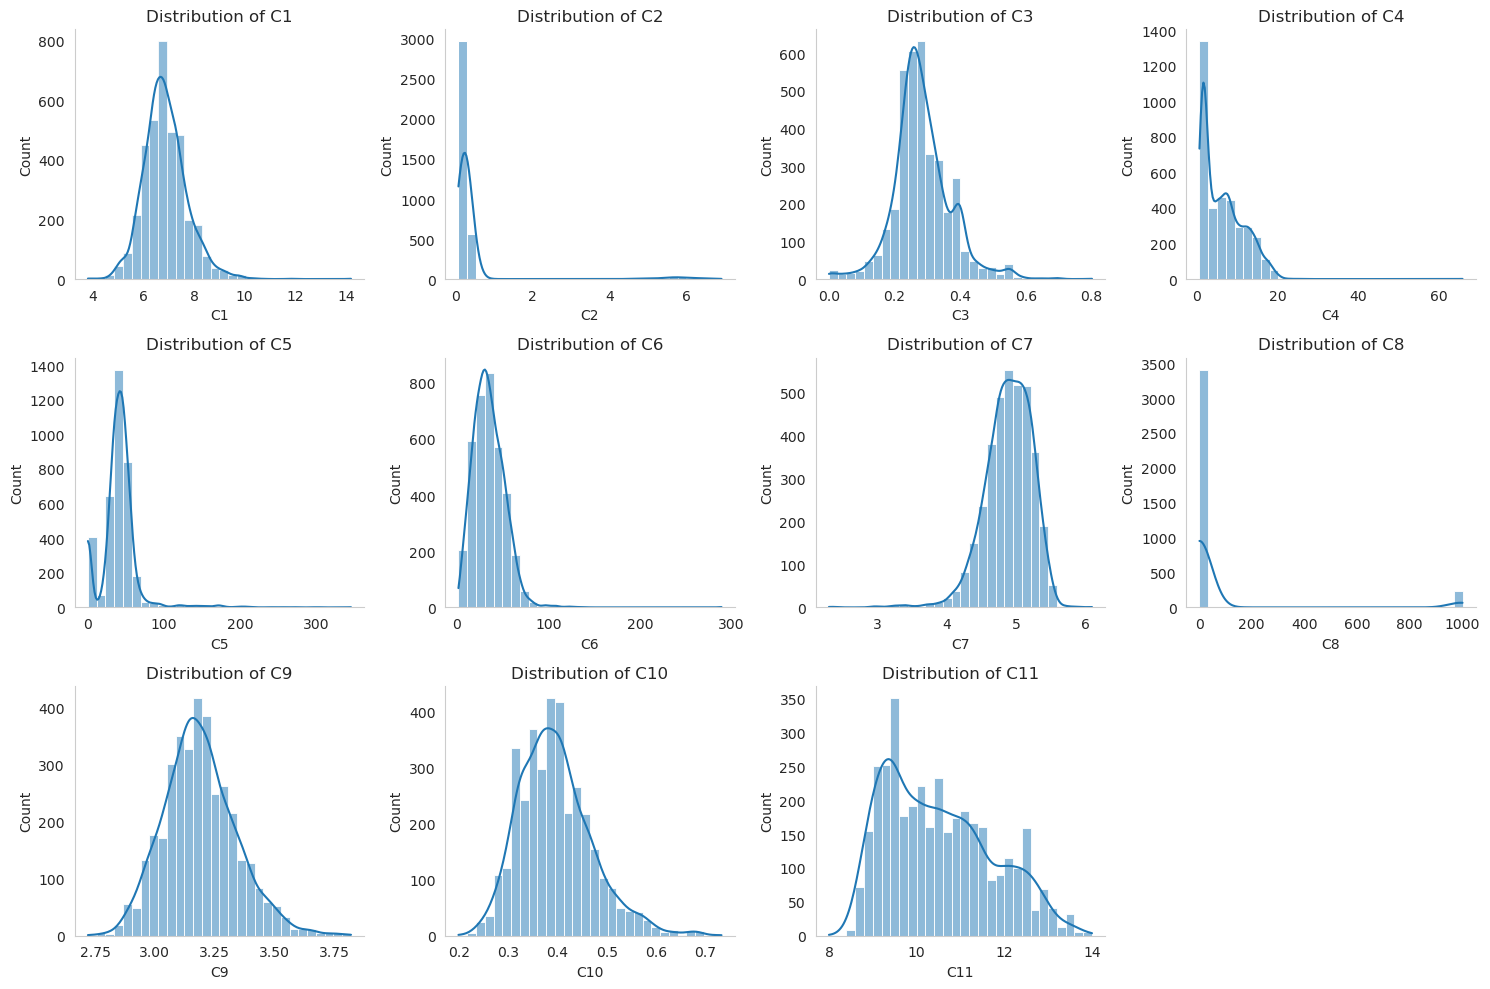

In [48]:
# Visualize the distribution of the data for each feature
plt.figure(figsize=(15, 10))

# Plotting the distribution of each column
for i, column in enumerate(features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(features[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.grid(False)
    sns.despine()

plt.show()

- Most features seem to be somewhat normally distributed, while some have a slightly skewed distribution.
- There are some features with noticeable peaks, suggesting potential groups or clusters in the data.
- Some features have a wider range than others, which can affect distance-based algorithms like KNN.

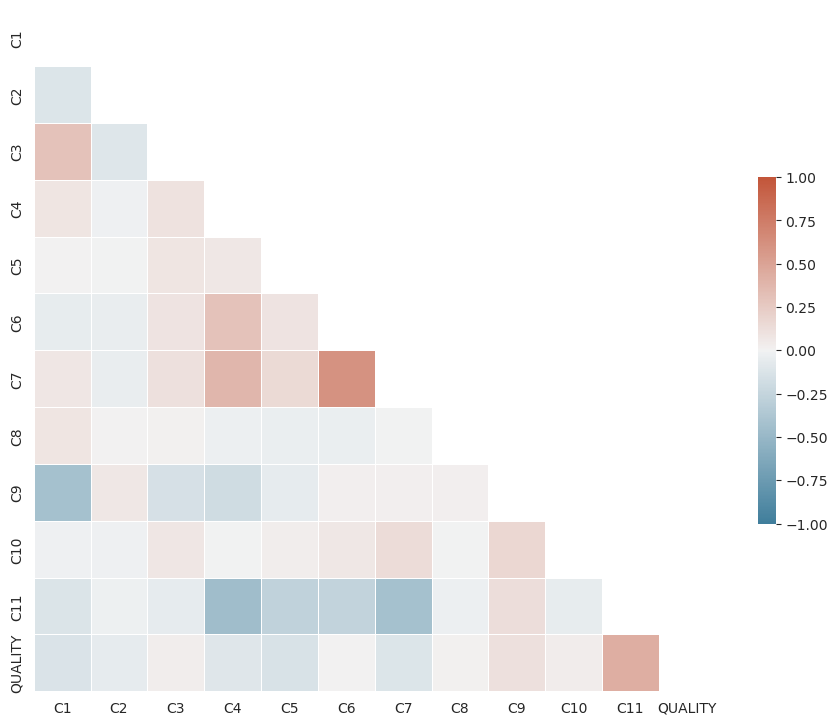

In [35]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.grid(False)
plt.show()

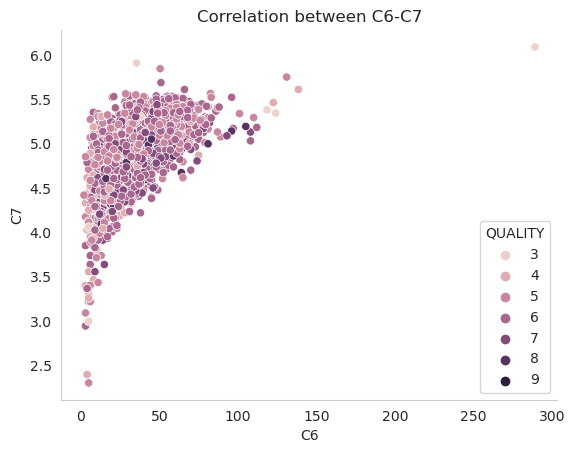

In [37]:
sns.scatterplot(x=data["C6"], y=data["C7"], hue=data["QUALITY"])
plt.grid(False)
plt.title("Correlation between C6-C7")
sns.despine()

In [38]:
# Assuming you have a DataFrame named 'df'
# You can use the 'isna()' method to create a DataFrame of boolean values where True represents NaN values
nan_values = data.isna()

# Then, use the 'sum()' method on the boolean DataFrame to count the number of True values in each column
# Since True is treated as 1 and False as 0 when performing arithmetic operations, the sum will give you the count of NaN values for each column
nan_count_per_row = nan_values.sum(axis=1)

# Finally, to get the total count of rows with at least one NaN value, count the number of rows with non-zero sum
total_rows_with_nan = (nan_count_per_row > 0).sum()

print("Total rows with NaN values:", total_rows_with_nan)

Total rows with NaN values: 2130


In [39]:
data_nan_rows = data[data.isna().any(axis=1)]
data_nan_rows

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY
1,6.2,0.246860,NaN,5.00,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8,6
6,9.2,0.536493,0.207014,6.20,42.00,15.0,4.543295,0.99480,NaN,0.292670,10.1,6
7,6.4,4.836282,0.254642,5.85,42.00,24.0,4.605170,992.00000,3.23,0.277632,NaN,7
10,6.9,0.182322,0.307485,1.50,31.00,38.0,4.997212,0.99310,NaN,0.444686,11.0,6
13,4.4,0.378436,0.095310,2.80,NaN,31.0,4.718499,0.98816,3.48,0.292670,13.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,8.0,0.246860,0.350657,7.10,45.00,41.0,5.135798,0.99590,3.17,NaN,10.6,5
3911,6.1,NaN,0.148420,1.30,0.06,36.0,4.844187,0.99353,3.13,0.378436,8.7,6
3912,6.6,0.223144,0.270027,NaN,35.00,32.0,4.852030,0.99210,3.41,0.385262,11.3,6
3913,7.7,NaN,0.215111,11.20,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3,7


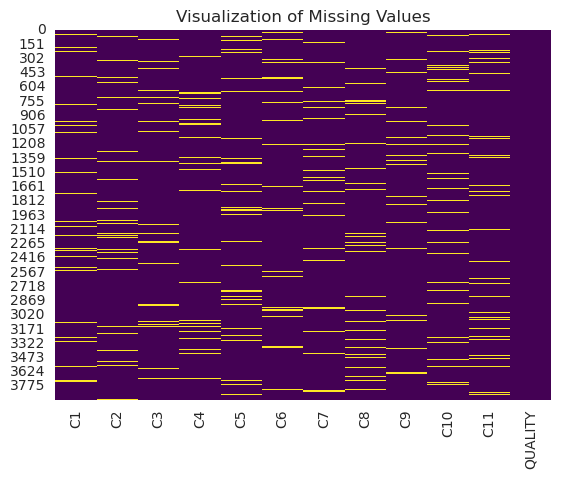

In [40]:
sns.heatmap(data.isna(), cbar=False, cmap="viridis")
plt.title("Visualization of Missing Values")
plt.show()

In [59]:
from sklearn.impute import KNNImputer

# Extract features and target for imputation
features = data.drop(columns=['QUALITY'])
target = data['QUALITY']

# Initialize the KNN Imputer with default k=5
knn_imputer = KNNImputer()

# Apply KNN imputation to the features
imputed_features = knn_imputer.fit_transform(features)

# Convert the imputed features back to a dataframe
imputed_df = pd.DataFrame(imputed_features, columns=features.columns)

# Add the target column back
imputed_df['QUALITY'] = target

# Display the first few rows of the imputed dataframe
imputed_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8,5
1,6.2,0.246860,0.225086,5.0,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8,6
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7,5
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4,5
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2,5


In [60]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a dataframe
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back
scaled_df['QUALITY'] = target

# Display the first few rows of the scaled dataframe
scaled_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,QUALITY
0,-0.067547,-0.233606,0.269706,2.296778,0.211719,-0.187366,0.035849,-0.264239,0.537082,-0.045344,-1.388887,5
1,-0.776503,-0.176687,NaN,-0.280256,0.092210,0.861279,1.042379,-0.264267,0.274156,1.332104,0.253204,6
2,-0.185706,-0.071637,0.520861,1.116457,-1.619167,1.502118,1.849300,-0.264248,0.800008,0.831983,-0.649946,5
3,-0.067547,-0.168811,1.397540,1.352521,0.490575,0.744763,1.133847,-0.264250,-0.646083,-0.320132,-0.896259,5
4,-0.303866,-0.208819,-0.518414,1.844322,-0.226482,0.628247,1.042379,-0.264247,0.339888,0.223929,-1.060468,5


In [61]:
scaled_df.isna().sum()

C1         234
C2         254
C3         270
C4         282
C5         259
C6         263
C7         273
C8         272
C9         260
C10        279
C11        260
QUALITY      0
dtype: int64

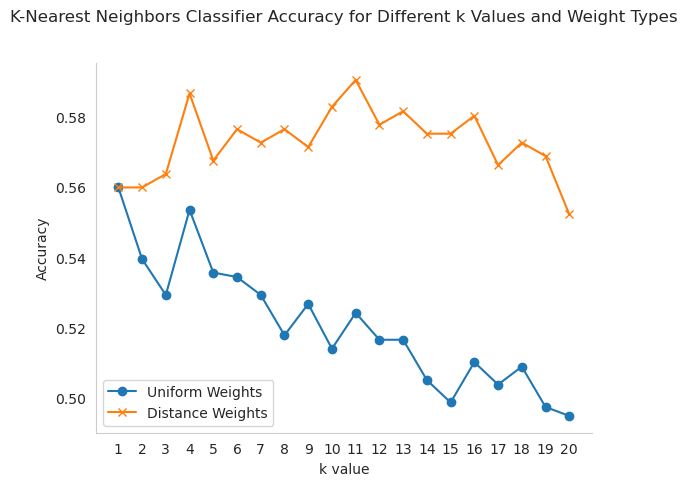

In [83]:
# Consolidated Code for K-Nearest Neighbors (KNN) Classification

# Import necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../Dataset/entrenamiento.xlsx")

# KNN imputation
knn_imputer = KNNImputer()
imputed_features = knn_imputer.fit_transform(df.drop(columns=['des']))
imputed_df = pd.DataFrame(imputed_features, columns=df.drop(columns=['des']).columns)
imputed_df['des'] = df['des']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_df.drop(columns=['des']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, imputed_df['des'], test_size=0.2, random_state=42)

# Determine the optimal k value and weighting scheme for KNN
k_values = list(range(1, 21))
accuracies_uniform = []
accuracies_distance = []

for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    preds_uniform = knn_uniform.predict(X_test)
    accuracies_uniform.append(accuracy_score(y_test, preds_uniform))
    
    # Distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    preds_distance = knn_distance.predict(X_test)
    accuracies_distance.append(accuracy_score(y_test, preds_distance))

# Visualization
#plt.figure(figsize=(12, 7))
plt.plot(k_values, accuracies_uniform, label='Uniform Weights', marker='o')
plt.plot(k_values, accuracies_distance, label='Distance Weights', marker='x')
plt.xlabel('k value')
plt.ylabel('Accuracy')

# Set the title with a pad to control the distance from the plot
plt.title('K-Nearest Neighbors Classifier Accuracy for Different k Values and Weight Types', pad=30)

plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.grid()

# Removing the right and top borders
ax = plt.gca()  # Get the current Axes instance
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['top'].set_visible(False)  # Hide the top spine

plt.show()


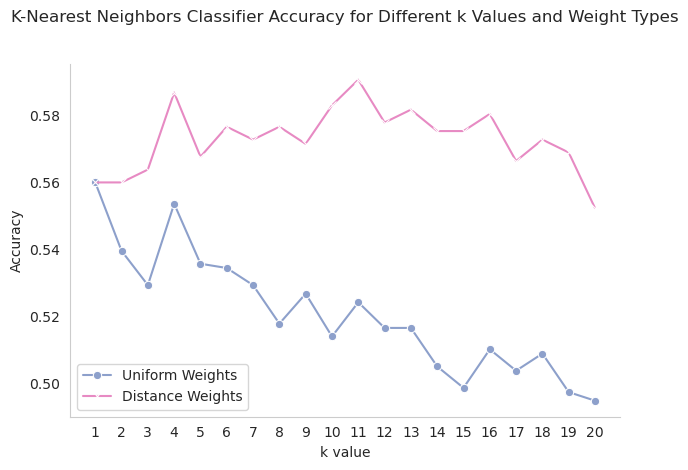

In [113]:
# Applying the muted palette to the plot

# Extract two colors from the "muted" palette
colors = sns.color_palette("Set2")

#plt.figure(figsize=(12, 7))
sns.lineplot(x=range(1, 21), y=accuracies_uniform, label='Uniform Weights', marker='o', color=colors[2])
sns.lineplot(x=range(1, 21), y=accuracies_distance, label='Distance Weights', marker='x', color=colors[3])
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Classifier Accuracy for Different k Values and Weight Types', pad=30)
plt.legend()
plt.grid(True)
plt.xticks(range(1, 21))
plt.tight_layout()
plt.grid()
sns.despine()
plt.show()